 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [218]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [171]:
# Reading whale returns
path_whale = Path("./Resources/whale_returns.csv")
df_whale = pd.read_csv(path_whale, infer_datetime_format=True)
df_whale["Date"] = pd.to_datetime(df_whale["Date"])
df_whale.set_index("Date", inplace=True)

In [172]:
# Count nulls
df_whale.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [173]:
# Drop nulls
returns_whale = df_whale.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [174]:
# Reading algorithmic returns
path_algo=Path("./Resources/algo_returns.csv")
df_algo = pd.read_csv(path_algo, infer_datetime_format=True)
df_algo["Date"] = pd.to_datetime(df_algo["Date"])
df_algo.set_index("Date", inplace=True)

In [175]:
# Count nulls
df_algo.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [176]:
# Drop nulls
# no null
returns_algo=df_algo.dropna()
returns_algo.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [177]:
# Reading S&P 500 Closing Prices
path_sp500 = Path("./Resources/sp500_history.csv")
df_sp500 = pd.read_csv(path_sp500, infer_datetime_format=True)

In [178]:
# Check Data Types
df_sp500.dtypes

Date     object
Close    object
dtype: object

In [179]:
# Fix Data Types
df_sp500["Date"] = pd.to_datetime(df_sp500["Date"])
df_sp500.set_index("Date", inplace=True)
df_sp500.sort_index(inplace=True)
df_sp500["Close"] = df_sp500["Close"].str.replace("$","").astype("float")
df_sp500.dtypes

<ipython-input-179-633b04390b41>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_sp500["Close"] = df_sp500["Close"].str.replace("$","").astype("float")


Close    float64
dtype: object

In [180]:
# Calculate Daily Returns
returns_sp500 = df_sp500.pct_change()
returns_sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [181]:
# Drop nulls
returns_sp500.dropna(inplace=True)

In [182]:
# Rename `Close` Column to be specific to this portfolio.
returns_sp500.rename(columns={"Close": "S&P500"}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [191]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
returns_all = pd.concat([returns_whale, returns_algo, returns_sp500], axis="columns", join="inner")
returns_all

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

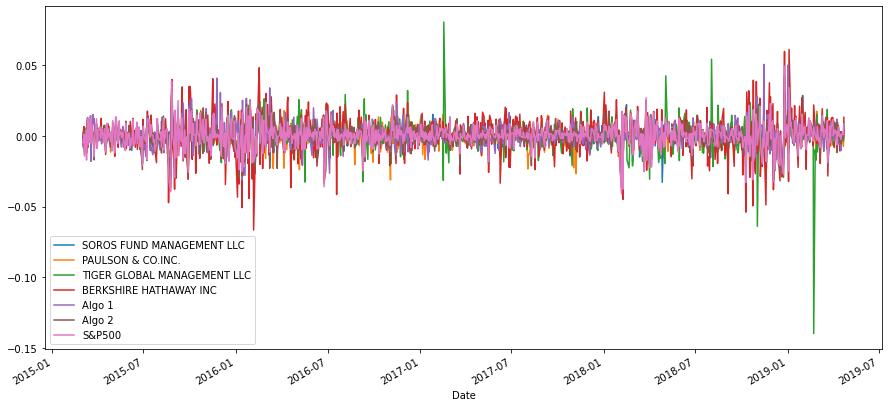

In [196]:
# Plot daily returns of all portfolios
returns_all.plot(figsize=(15,7))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

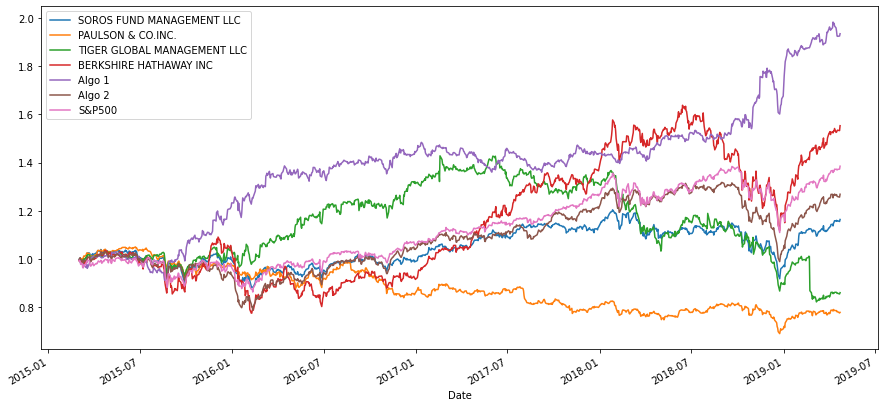

In [197]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + returns_all).cumprod()
cumulative_returns
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,7))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

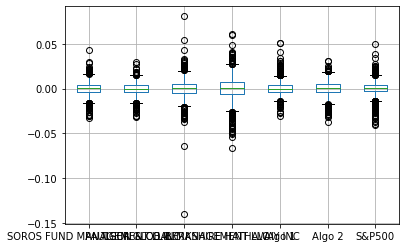

In [195]:
# Box plot to visually show risk
returns_all.boxplot()

### Calculate Standard Deviations

In [205]:
# Calculate the daily standard deviations of all portfolios
daily_std_all = returns_all.std()
daily_std_all

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [212]:
# Calculate  the daily standard deviation of S&P 500
std_sp500 = daily_std_all["S&P500"]
# Determine which portfolios are riskier than the S&P 500
risky_portfolios = []
for portfolio, std in daily_std_all.items():
    if std > std_sp500:
        risky_portfolios.append(portfolio)
        
risky_portfolios

0.008553731597758204


['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']

### Calculate the Annualized Standard Deviation

In [213]:
# Calculate the annualized standard deviation (252 trading days)
annual_std_all = daily_std_all * np.sqrt(252)
annual_std_all

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

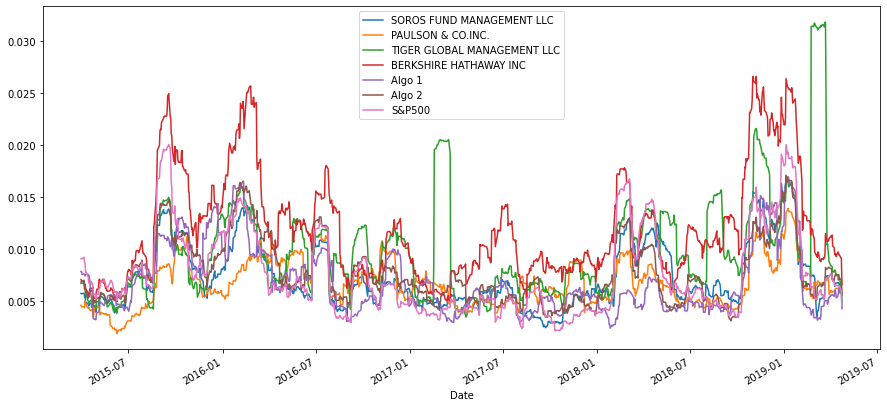

In [216]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
returns_all.rolling(window=21).std().plot(figsize=(15,7))
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

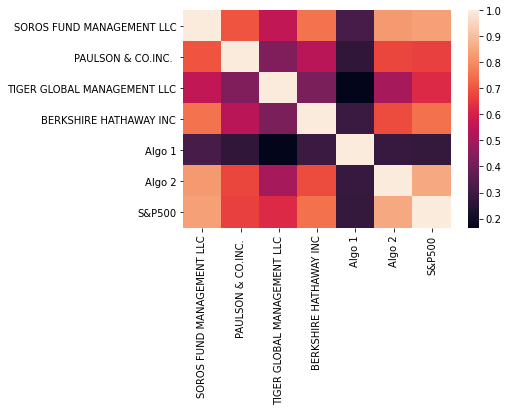

In [220]:
# Calculate the correlation
returns_all.corr()
# Display de correlation matrix
sns.heatmap(returns_all.corr())

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

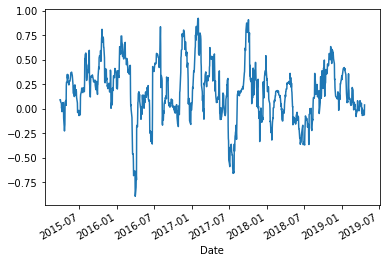

In [225]:
# Calculate covariance of a single portfolio
covariance_algo1 = returns_all["Algo 1"].cov(returns_all['S&P500'])
# Calculate variance of S&P 500
variance = returns_all['S&P500'].var()
# Computing beta
beta = covariance_algo1 / variance
# Plot beta trend
rolling_cov = returns_all["Algo 1"].rolling(window=21).cov(returns_all['S&P500'])
rolling_var = returns_all['S&P500'].rolling(window=21).var()
rolling_beta = rolling_cov/rolling_var
rolling_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [226]:
# Annualized Sharpe Ratios
sharpe_ratios = (returns_all.mean() * 252) / (returns_all.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:>

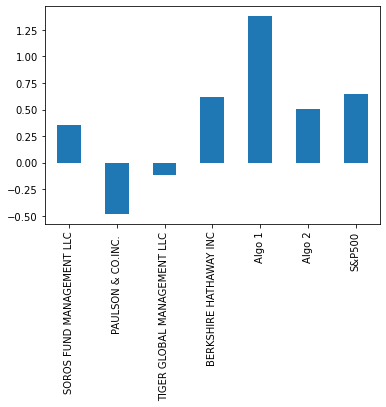

In [229]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 outperformed all porfolios! Algo 2 did not.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [288]:
# Reading data from 1st stock
path_amd = Path("./Resources/amd.csv")
df_amd=pd.read_csv(path_amd, infer_datetime_format=True)
df_amd.rename(columns={"Close":"AMD"}, inplace=True)
df_amd["Date"] = pd.to_datetime(df_amd["Date"]).dt.date
df_amd.set_index("Date", inplace=True)
df_amd.head()

,AMD
Date,
2018-04-23,10.04
2018-04-24,10.09
2018-04-25,9.71
2018-04-26,11.04
2018-04-27,11.11


In [289]:
# Reading data from 2nd stock
path_tsla = Path("./Resources/tsla.csv")
df_tsla = pd.read_csv(path_tsla, infer_datetime_format=True)
df_tsla.rename(columns={"Close":"TSLA"}, inplace=True)
df_tsla["Date"] = pd.to_datetime(df_tsla["Date"]).dt.date
df_tsla.set_index("Date", inplace=True)
df_tsla.head()

,TSLA
Date,
2018-04-23,56.67
2018-04-24,56.69
2018-04-25,56.14
2018-04-26,57.10
2018-04-27,58.82


In [290]:
# Reading data from 3rd stock
path_tsm = Path("./Resources/tsm.csv")
df_tsm = pd.read_csv(path_tsm, infer_datetime_format=True)
df_tsm["Date"] = pd.to_datetime(df_tsm["Date"]).dt.date
df_tsm.rename(columns={"Close":"TSM"}, inplace=True)
df_tsm.set_index("Date", inplace=True)
df_tsm.head()

,TSM
Date,
2018-04-23,38.75
2018-04-24,38.75
2018-04-25,38.17
2018-04-26,38.17
2018-04-27,38.17


In [291]:
# Combine all stocks in a single DataFrame
all_closing_prices = pd.concat([df_amd,df_tsla,df_tsm], axis="columns", join="inner")
all_closing_prices.head()

,AMD,TSLA,TSM
Date,,,
2018-04-23,10.04,56.67,38.75
2018-04-24,10.09,56.69,38.75
2018-04-25,9.71,56.14,38.17
2018-04-26,11.04,57.10,38.17
2018-04-27,11.11,58.82,38.17


In [292]:
# Calculate daily returns
returns_daily = all_closing_prices.pct_change().dropna()
# Drop NAs

# Display sample data
returns_daily.head()

,AMD,TSLA,TSM
Date,,,
2018-04-24,0.004980,0.000353,0.000000
2018-04-25,-0.037661,-0.009702,-0.014968
2018-04-26,0.136972,0.017100,0.000000
2018-04-27,0.006341,0.030123,0.000000
2018-04-30,-0.020702,-0.000680,0.007336


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [293]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
returns_portfolio = returns_daily.dot(weights)
# Display sample data
returns_portfolio = returns_portfolio.to_frame()
returns_portfolio.rename(columns={0:"Michael"}, inplace=True)
returns_portfolio.head()

,Michael
Date,
2018-04-24,0.001778
2018-04-25,-0.020777
2018-04-26,0.051357
2018-04-27,0.012154
2018-04-30,-0.004682


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [299]:
# Join your returns DataFrame to the original returns DataFrame
returns_all = pd.concat([returns_portfolio, returns_all], axis="columns",join="inner")
returns_all.head()

,Michael,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,
2018-04-24 00:00:00,0.001778,-0.010467,-0.002791,-0.015645,-0.011289,0.004873,-0.006742,-0.013381
2018-04-25 00:00:00,-0.020777,-0.000199,-0.002036,0.003021,-0.009720,-0.000113,-0.001679,0.001837
2018-04-26 00:00:00,0.051357,0.007127,0.004416,0.005724,0.018664,-0.003238,0.005543,0.010434
2018-04-27 00:00:00,0.012154,-0.032711,0.000142,0.001663,-0.005245,-0.002001,-0.000782,0.001114
2018-04-30 00:00:00,-0.004682,0.004538,-0.011806,-0.015002,-0.001435,-0.002609,-0.008726,-0.008188


In [309]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_std_all = returns_all.std().dropna()
daily_std_all

Michael                        0.023732
SOROS FUND MANAGEMENT LLC      0.009377
PAULSON & CO.INC.              0.007364
TIGER GLOBAL MANAGEMENT LLC    0.014683
BERKSHIRE HATHAWAY INC         0.015243
Algo 1                         0.008248
Algo 2                         0.008612
S&P500                         0.009474
dtype: float64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [310]:
# Calculate the annualized `std`
annual_std_all = daily_std_all * np.sqrt(252)
annual_std_all

Michael                        0.376731
SOROS FUND MANAGEMENT LLC      0.148854
PAULSON & CO.INC.              0.116905
TIGER GLOBAL MANAGEMENT LLC    0.233081
BERKSHIRE HATHAWAY INC         0.241978
Algo 1                         0.130935
Algo 2                         0.136706
S&P500                         0.150398
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

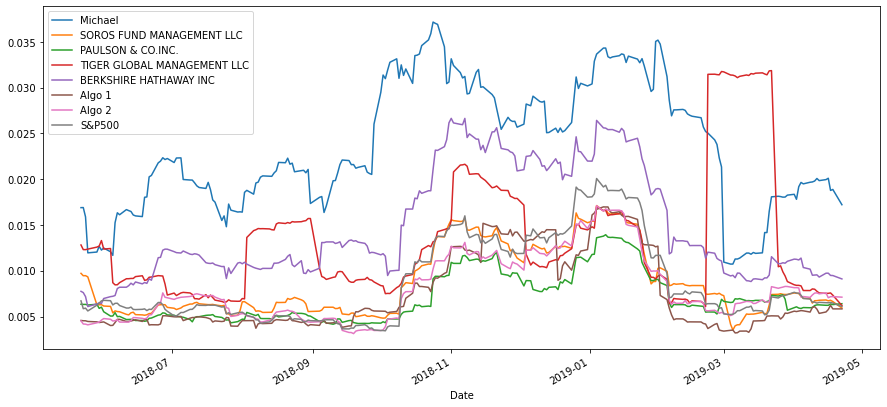

In [311]:
# Calculate rolling standard deviation
returns_all.rolling(window=21).std().plot(figsize=(15,7))
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

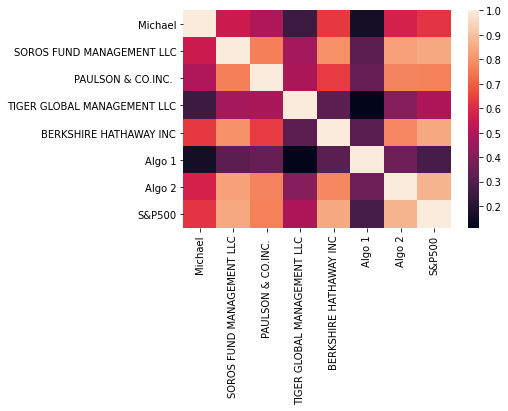

In [312]:
# Calculate and plot the correlation
returns_all.corr()
sns.heatmap(returns_all.corr())

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

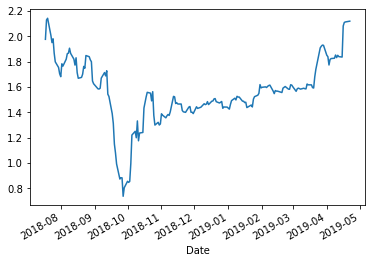

In [313]:
# Calculate and plot Beta
rolling_cov = returns_all["Michael"].rolling(window=60).cov(returns_all['S&P500'])
rolling_var = returns_all['S&P500'].rolling(window=60).var()
rolling_beta = rolling_cov/rolling_var
rolling_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [307]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (returns_all.mean() * 252) / (returns_all.std() * np.sqrt(252))
sharpe_ratios

Michael                        1.375925
SOROS FUND MANAGEMENT LLC      0.242796
PAULSON & CO.INC.              0.083825
TIGER GLOBAL MANAGEMENT LLC   -0.895631
BERKSHIRE HATHAWAY INC         0.167584
Algo 1                         2.114227
Algo 2                         0.092016
S&P500                         0.646497
dtype: float64

<AxesSubplot:>

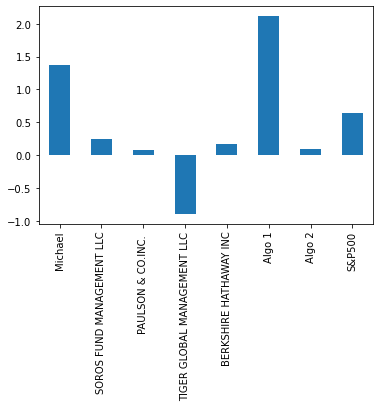

In [308]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### How does your portfolio do?

Write your answer here!

<AxesSubplot:xlabel='Date'>

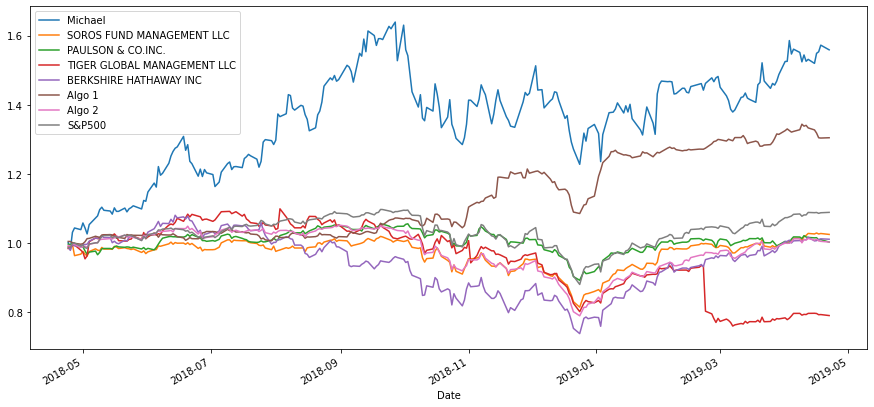

In [314]:
cumulative_returns = (1 + returns_all).cumprod()
cumulative_returns
cumulative_returns.plot(figsize=(15,7))

Looks like Michael's Portfolio outperformed even the legendary Algo 1!